In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
singe_bar_resturant=pd.read_csv("data_sources/nightlife_data_combined.csv")
singe_Apartment=pd.read_csv("data_sources/final_grouped_Atx_Apartment.csv")



In [4]:
singe_bar_resturant.head()

,Unnamed: 0,Zip Code,Restaurant Count,Restaurant Rating,Bar Count,Bar Rating,Club Count,Club Rating,Bar/Restaurant Count,Bar/Restaurant Rating,Total Nightlife Count,Combined Rating
0,0,73301,3.0,4.500000,0.0,0.000000,0.0,0.000000,3.0,9.000000,3.0,9.000000
1,1,78617,1.0,4.000000,2.0,3.000000,0.0,0.000000,3.0,6.666667,3.0,6.666667
2,2,78646,2.0,4.500000,0.0,0.000000,0.0,0.000000,2.0,9.000000,2.0,9.000000
3,3,78660,4.0,3.125000,2.0,3.000000,0.0,0.000000,6.0,6.166667,6.0,6.166667
4,4,78701,201.0,4.186567,194.0,4.265464,223.0,3.376682,618.0,5.401294,618.0,7.838188


In [5]:
singe_Apartment=singe_Apartment[[ "Zip code", "count"]]
singe_Apartment.rename(columns = {'Zip code':'Zip Code'}, inplace = True)
singe_Apartment.head()

,Zip Code,count
0,78613,1
1,78701,118
2,78702,96
3,78703,49
4,78704,77


In [8]:
sort_single_bar= pd.merge(singe_bar_resturant,singe_Apartment, on= "Zip Code", how="outer")
sort_single_bar.head()

,Unnamed: 0,Zip Code,Restaurant Count,Restaurant Rating,Bar Count,Bar Rating,Club Count,Club Rating,Bar/Restaurant Count,Bar/Restaurant Rating,Total Nightlife Count,Combined Rating,count
0,0.0,73301,3.0,4.500000,0.0,0.000000,0.0,0.000000,3.0,9.000000,3.0,9.000000,NaN
1,1.0,78617,1.0,4.000000,2.0,3.000000,0.0,0.000000,3.0,6.666667,3.0,6.666667,NaN
2,2.0,78646,2.0,4.500000,0.0,0.000000,0.0,0.000000,2.0,9.000000,2.0,9.000000,NaN
3,3.0,78660,4.0,3.125000,2.0,3.000000,0.0,0.000000,6.0,6.166667,6.0,6.166667,NaN
4,4.0,78701,201.0,4.186567,194.0,4.265464,223.0,3.376682,618.0,5.401294,618.0,7.838188,118.0


In [9]:
sort_single_bar2=sort_single_bar.sort_values(["Total Nightlife Count"], ascending=False)

In [10]:
sort_single_bar2.rename(columns = {'count':'Apartments count'}, inplace = True)
sort_single_bar2.head()

,Unnamed: 0,Zip Code,Restaurant Count,Restaurant Rating,Bar Count,Bar Rating,Club Count,Club Rating,Bar/Restaurant Count,Bar/Restaurant Rating,Total Nightlife Count,Combined Rating,Apartments count
4,4.0,78701,201.0,4.186567,194.0,4.265464,223.0,3.376682,618.0,5.401294,618.0,7.838188,118.0
8,8.0,78705,139.0,4.388489,142.0,3.742958,15.0,5.000000,296.0,7.712838,296.0,8.219595,218.0
5,5.0,78702,99.0,4.368687,106.0,4.367925,14.0,4.071429,219.0,8.178082,219.0,8.698630,96.0
41,41.0,78756,93.0,4.225806,59.0,3.940678,0.0,0.000000,152.0,8.230263,152.0,8.230263,27.0
43,43.0,78758,68.0,4.161765,53.0,3.650943,6.0,3.250000,127.0,7.503937,127.0,7.811024,70.0


In [11]:
df= sort_single_bar2.loc[sort_single_bar2["Total Nightlife Count"]>=127]

In [12]:
df.reset_index(inplace=True)
df.head()

,index,Unnamed: 0,Zip Code,Restaurant Count,Restaurant Rating,Bar Count,Bar Rating,Club Count,Club Rating,Bar/Restaurant Count,Bar/Restaurant Rating,Total Nightlife Count,Combined Rating,Apartments count
0,4,4.0,78701,201.0,4.186567,194.0,4.265464,223.0,3.376682,618.0,5.401294,618.0,7.838188,118.0
1,8,8.0,78705,139.0,4.388489,142.0,3.742958,15.0,5.000000,296.0,7.712838,296.0,8.219595,218.0
2,5,5.0,78702,99.0,4.368687,106.0,4.367925,14.0,4.071429,219.0,8.178082,219.0,8.698630,96.0
3,41,41.0,78756,93.0,4.225806,59.0,3.940678,0.0,0.000000,152.0,8.230263,152.0,8.230263,27.0
4,43,43.0,78758,68.0,4.161765,53.0,3.650943,6.0,3.250000,127.0,7.503937,127.0,7.811024,70.0


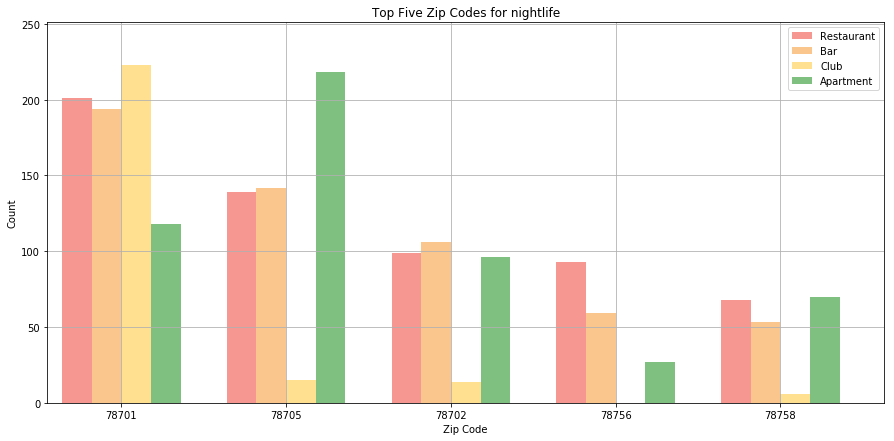

In [14]:
zipcode=[]
pos =  list(range(len(df['Bar Count']))) 
width = 0.18 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,7))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['Restaurant Count'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=df['Zip Code'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['Bar Count'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=df['Zip Code'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        df['Club Count'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=df['Zip Code'][2])

plt.bar([p + width*3 for p in pos],
        #using df['pre_score'] data,
        df['Apartments count'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='green', 
        # with label the first value in first_name
        label=df['Zip Code'][3]) 
 

# Set the y axis label
ax.set_ylabel('Count')
ax.set_xlabel('Zip Code')

# Set the chart's title
ax.set_title('Top Five Zip Codes for nightlife')

# Set the position of the x ticks
ax.set_xticks([p +1.5* width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['Zip Code'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*5)
plt.ylim([0, max(df['Restaurant Count']+50)] )

# Adding the legend and showing the plot
plt.legend(['Restaurant', 'Bar', 'Club', 'Apartment'], loc='best')
plt.grid()
fig.savefig('Images/Top Five zip Code for nightlife.png')
plt.show()

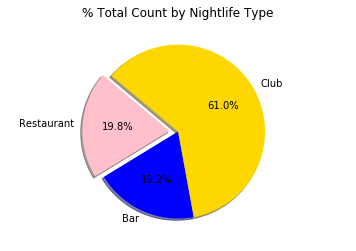

In [15]:
Restaurant=df["Restaurant Count"][0]
Bar=df["Bar Count"][0]
Club=df["Total Nightlife Count"][0]

#give labet to that
labels = ["Restaurant", "Bar", "Club"]

# The values of each section of the pie chart
sizes = [Restaurant, Bar, Club]

# The colors of each section of the pie chart
colors = ["pink", "blue", "gold"]
# Tells matplotlib to seperate the "Python" section from the others 

explode = (0.1, 0, 0)
fig = plt.figure()
plt.axis("equal")
plt.title("% Total Count by Nightlife Type")
#show plot 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

fig.savefig('Images/nightlife_pie.png')